# Day 18

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 이항 확률 분포

성공확률이 $\theta$ 인 베르누이 시도를 $N$번 하는 경우를 생각해 보자. 가장 운이 좋을 때에는 $N$번 모두 성공할 것이고 가장 운이 나쁜 경우에는 한 번도 성공하지 못할 겻이다. $N$번 중 성공한 횟수를 확률 변수 $X$ 라고 한다면 $X$의 값은 0 부터 $N$ 까지의 정수 중 하나가 될 것이다. 

이러한 확률 변수를 **이항 분포(binomial distribution)**를 따르는 확률 변수라고 하며 다음과 같이 표시한다.

$$ X \sim \text{Bin}(x;N,\theta)  $$

이항 확률 분포를 수식으로 묘사해 보자.

0 또는 1이 나오는 베르누이 확률 분포를 따르는 확률 변수 $Y$를 가정한다. 

$$ Y \sim \text{Bern}(y;\theta) $$

이 확률 변수의 $N$개의 샘플을 $y_1, y_2, \cdots, y_N$라고 하자. 이 값은 모두 0(실패) 아니면 1(성공) 이라는 값을 가지기 때문에 $N$번 중 성공한 횟수는 $N$개의 샘플 값의 총합이다.

$$ X = \sum_{i=1}^N y_i $$

이항 확률 분포를 수식으로 쓰면 다음과 같다.

$$ \text{Bin}(x;N,\theta) = \binom N x  \theta^x(1-\theta)^{N-x} $$

이 식에서 $()$ 기호와 $!$ 기호는 각각 조합(combination)과 팩토리얼(factorial)을 뜻하면 다음과 같이 정의한다.

$$ \binom N x =\dfrac{N!}{x!(N-x)!} $$

$$ N! = N\cdot (N-1) \cdots 2 \cdot 1 $$


## SciPy를 사용한 베르누이 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 `binom` 클래스는 이항 분포 클래스이다. `n` 인수와 `p` 인수를 사용하여 모수를 설정한다

In [56]:
from scipy.stats import binom

N = 20
theta = 0.68
rv = binom(N, theta)
rv

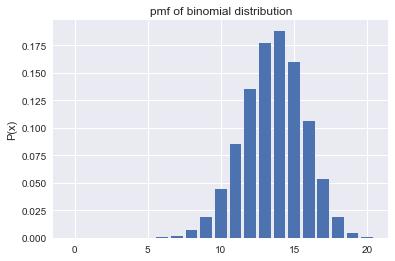

In [57]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("pmf of binomial distribution")
plt.show()

In [58]:
np.random.seed(0)
x = rv.rvs(100)
x

array([13, 12, 13, 13, 14, 13, 14, 11, 10, 14, 12, 14, 13, 11, 17, 16, 18,
       12, 12, 11,  9, 12, 14, 12, 16, 13, 16, 10, 14, 14, 15, 12, 14, 13,
       18, 13, 13, 13, 10, 13, 14, 14, 13, 17, 13, 13, 15, 16, 15, 14, 13,
       14,  9, 16, 15, 16, 13, 15, 14, 15, 16, 16, 13, 16, 15, 14, 12, 16,
       12, 16,  9, 14,  9, 13, 12, 17, 15, 16, 15, 16, 15, 14, 17, 13, 13,
       15, 14, 16, 13, 10, 15, 13, 16, 12, 15, 15, 13, 18, 12, 18])

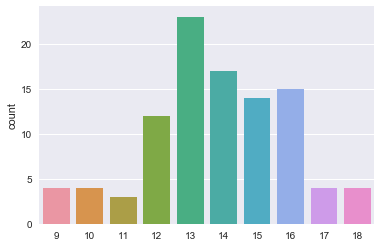

In [59]:
sns.countplot(x)
plt.show()

In [60]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"theoretic": rv.pmf(xx), "simulation": y}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.pivot("value", "type", "ratio")

type,simulation,theoretic
value,,
0,0.00,1.267651e-10
1,0.00,5.387515e-09
2,0.00,1.087605e-07
3,0.00,1.386696e-06
4,0.00,1.252360e-05
5,0.00,8.516046e-05
6,0.00,4.524149e-04
7,0.00,1.922764e-03
8,0.00,6.639543e-03


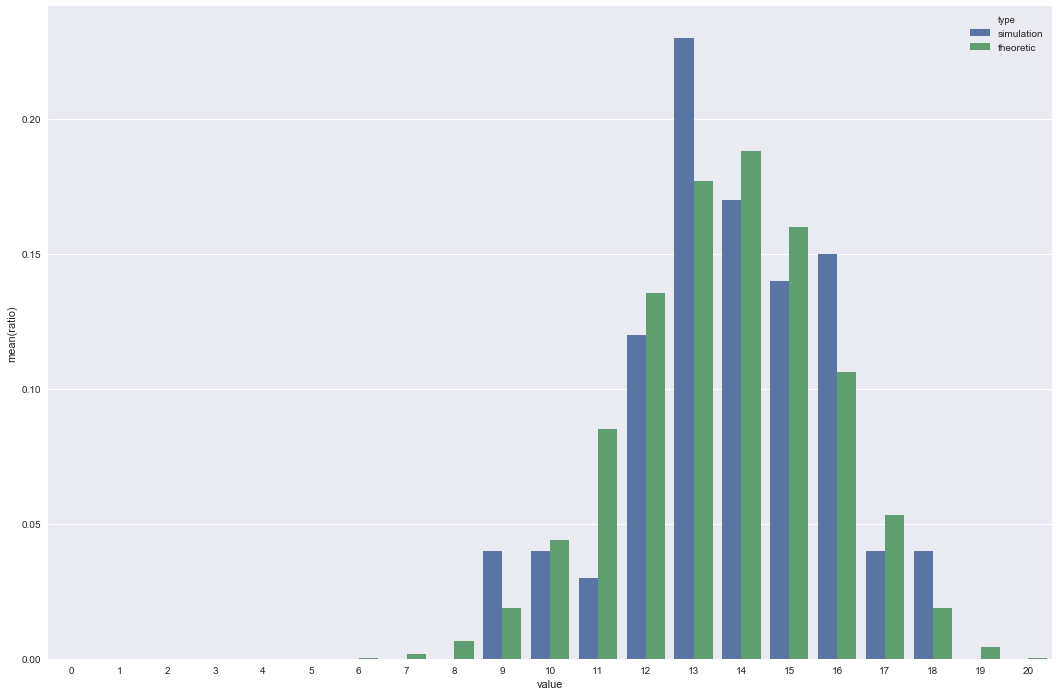

In [63]:
plt.figure(figsize=(18,12))
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

## 이항 분포의 모멘트

이항 분포의 기댓값과 분산은 각각 다음과 같다.

### 기댓값

$$ \text{E}[X] = N\theta $$

(증명)

$$ \text{E}[X] = \text{E} \left[ \sum_{i=1}^N \text{Bern}_i \right] = \sum_{i=1}^N  \text{E}[ \text{Bern}_i ] = N\theta $$


여기에서 $\text{Bern}_i$는 $i$번째 시도의 결과로 나온 숫자로써 서로 독립인 베르누이 분포이다.

### 분산

$$ \text{Var}[X] = N\theta(1-\theta)$$

(증명)

$$ \text{Var}[X] = \text{Var} \left[ \sum_{i=1}^N \text{Bern}_i \right] = \sum_{i=1}^N  \text{Var}[ \text{Bern}_i ] = N\theta(1-\theta)$$

#### 연습 문제 1

베르누이 확률 분포의 모수가 다음과 같을 경우에 각각 샘플을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 카운트 플롯을 그린다. 

샘플의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

1. $\theta = 0.5$, $N=5$
2. $\theta = 0.9$, $N=10$

# 가우시안 정규 분포

가우시안 정규 분포(Gaussian normal distribution), 혹은 그냥 간단히 정규 분포라고 부르는 분포는 자연 현상에서 나타나는 숫자를 확률 모형으로 모형화할 때 가장 많이 사용되는 확률 모형이다.

정규 분포는 평균 $\mu$와 분산 $\sigma^2$ 이라는 두 개의 모수만으로 정의되며 확률 밀도 함수는 다음과 같은 수식으로 표현된다.

 $$ \mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right) $$

정규 분포 중에서도 평균이 0 이고 분산이 1 인 ($\mu=0$, $\sigma^2=1$) 정규 분포를 표준 정규 분포(standard normal distribution)라고 한다.

## SciPy를 사용한 정규 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 norm 클래스는 정규 분포에 대한 클래스이다. `loc` 인수로 평균을 설정하고 `scale` 인수로 표준 편차를 설정한다.

In [70]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)
rv

In [89]:
from scipy.stats import norm
norm.ppf(0.02)

-2.053748910631823

In [ ]:
from scipy.stats.rv_continuous import ppf

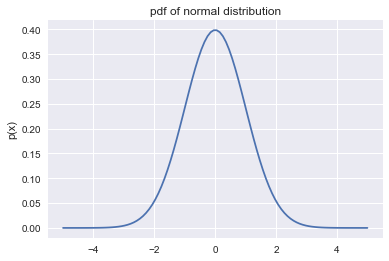

In [71]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("pdf of normal distribution")
plt.show()

## Q-Q 플롯

정규 분포는 여러가지 연속 확률 분포 중에서도 가장 유용한 특성을 지니며 널리 사용되는 확률 분포이다. 따라서 어떤 확률 변수의 분포가 정규 분포인지 아닌지 확인하는 것은 정규 분포 검정(normality test)은 가장 중요한 통계적 분석 중의 하나이다. 그러나 구체적인 정규 분포 검정을 사용하기에 앞서 시작적으로 간단하게 정규 분포를 확인하는 Q-Q 플롯을 사용할 수 있다.

Q-Q(Quantile-Quantile) 플롯은 분석하고자 하는 샘플의 분포과 정규 분포의 분포 형태를 비교하는 시각적 도구이다. Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 분포의 값을 한 쌍으로 만들어 스캐터 플롯(scatter plot)으로 그린 것이다. Q-Q 플롯을 그리는 구체적인 방법은 다음과 같다. 

1. 대상 샘플을 크기에 따라 정렬(sort)한다. 
2. 각 샘플의 분위수(quantile number)를 구한다.
3. 각 샘플의 분위수와 일치하는 분위수를 가지는 정규 분포 값을 구한다.
4. 대상 샘플과 정규 분포 값을 하나의 쌍으로 생각하여 2차원 공간에 하나의 점(point)으로 그린다.
5. 모든 샘플에 대해 2부터 4까지의 과정을 반복하여 스캐터 플롯과 유사한 형태의 플롯을 완성한다.
6. 비교를 위한 45도 직선을 그린다. 

SciPy 패키지의 stats 서브 패키지는 Q-Q 플롯을 계산하고 그리기 위한 `probplot` 명령을 제공한다. 

* http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

`probplot`은 기본적으로 인수로 보낸 데이터 샘플에 대한 Q-Q 정보만을 반환하고 챠트는 그리지 않는다. 만약 차트를 그리고 싶다면 `plot` 인수에 matplotlib.pylab 모듈 객체 혹은 `Axes` 클래스 객체를 넘겨주어야 한다.

정규 분포를 따르는 데이터 샘플을 Q-Q 플롯으로 그리면 다음과 같이 직선의 형태로 나타난다.

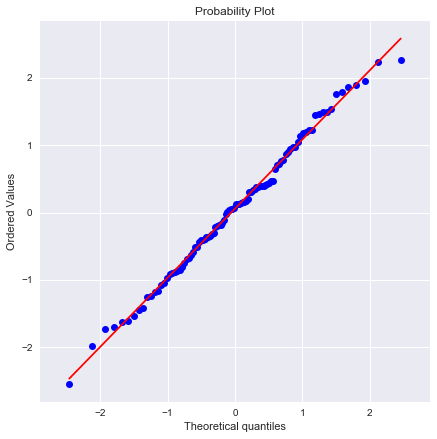

In [72]:
np.random.seed(0)
x = np.random.randn(100)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

정규 분포를 따르지 않는 데이터 샘플을 Q-Q 플롯으로 그리면 다음과 같이 직선이 아닌 휘어진 형태로 나타난다.

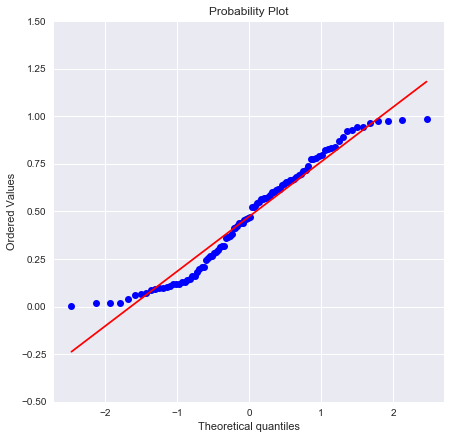

In [73]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

## 중심 극한 정리

실세계에서 발생하는 현상 중 많은 것들이 정규 분포로 모형화 가능하다. 그 이유 중의 하나는 다음과 같은 중심 극한 정리(Central Limit Theorem)이다. 중심 극한 정리는 어떤 분포를 따르는 확류 변수든 간에 해당 확률 변수가 복수인 경우 그 합은 정규 분포와 비슷한 분포를 이루는 현상을 말한다.

중심 극한 정리를 수학적인 용어로 쓰면 다음과 같다.

$X_1, X_2, \ldots, X_n$가 기댓값이 $\mu$이고 분산이 $\sigma^2$으로 동일한 분포이며 서로 독립인 확률 변수들이라고 하자. 분포가 어떤 분포인지는 상관없다.

이 분포의 합

$$ S_n = X_1+\cdots+X_n $$ 

도 마찬가지로 확률 변수이다. 이 확률 변수 $S_n$의 분포는 $n$이 증가할 수록 다음과 같은 정규 분포에 수렴한다.

$$ \dfrac{S_n - n\mu}{\sqrt{n}} \xrightarrow{d}\ N(0,\;\sigma^2) $$

시뮬레이션을 사용하여 중심 극한 정리가 성립하는지 살펴보도록 하자.

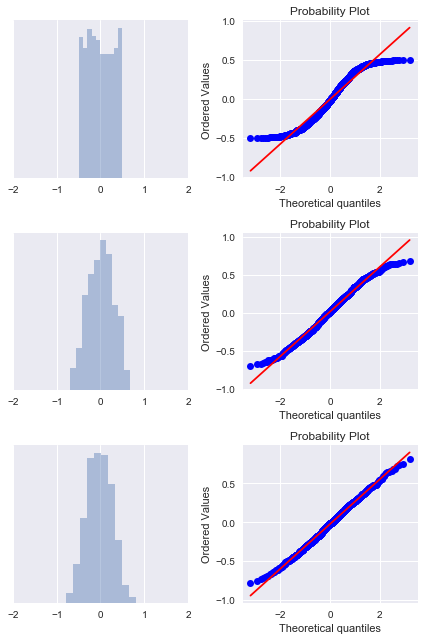

In [90]:
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6,9))
for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(1000, N) - 0.5
    S = X.sum(axis=1)/np.sqrt(N)
    plt.subplot(3, 2, 2*i+1)
    sns.distplot(S, bins=10, kde=False, norm_hist=True)
    plt.xlim(-2, 2)
    plt.yticks([])
    plt.subplot(3, 2, 2*i+2)
    sp.stats.probplot(S, plot=plt)
    
plt.tight_layout()
plt.show()

# 스튜던트 t 분포

## Fat tail 현상

데이터 분석 실무에서는 자연에서 발생하는 현상 중 많은 것들을 정규 분포를 따르는 확률 변수로 모형화하여 사용하고 있다. 그러나 이러한 데이터들을 자세히 살펴보면 실제로는 정규분포보다 양 끝단의 비중이 더 큰것을 알 수 있다. 이를 fat tail 현상이라고 한다.

## 모멘트

스튜던트 t 분포의 기댓값과 분산은 다음과 같다.

* 기댓값: 
$$\text{E}[X] = 0 $$

* 분산: ($\nu > 2$ 인 경우만 적용됨. $\nu=1,2$일 때는 분산이 무한대)
$$ \text{Var}[X] = \dfrac{\nu \sigma^2}{\nu-2} $$


## 샘플 평균 분포

중심 극한 정리(Central Limit Theorem)에 따르면 모든 확률 변수의 합(또는 평균)은 샘플의 갯수가 증가할 수록 가우시안 정규 분포에 가까워진다.
그러면 샘플의 수가 무한대가 아닌 유한한 경우는 어떨까? 

가우시안 정규 분포로부터 얻은 $n$개의 샘플 $x_1, \cdots, x_n$ 로부터 정의한 다음과 같은 값은 자유도가 $n-1$인 스튜던트 t 분포를 이룬다.

$$  t = \frac{\bar{x} - \mu}{\dfrac{s}{\sqrt{n}}} $$

이 식에서 

$$ \bar{x} = \frac{x_1+\cdots+x_n}{n}  $$

$$ s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2 $$


**X가 임의의 분포일 경우 무한히 더하면 정규분포에 가까워진다. 한편 정규분포는 유한개를 더할경우 정규분포이며 유한개의 합을 분산으로 나눌경우 t-분포가 된다.**

$$\sum X \rightarrow N$$
$$\frac{\sum N}{S} = t-distribution$$

In [139]:
mu = 3.14
sigma = 1.618
sample_set = pd.DataFrame(sigma * np.random.randn(200,100) + mu)
sample_set['xbar'] = sample_set.apply(lambda x: np.mean(x), axis=1)
sample_set['s'] = sample_set.apply(lambda x: np.std(x), axis=1)
sample_set['t'] = (sample_set['xbar']-mu)/(sample_set['s']/np.sqrt(100))

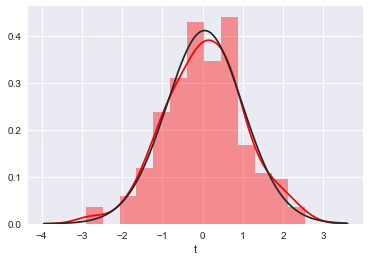

In [140]:
import seaborn as sns
sns.distplot(sample_set['t'], color='r', fit=sp.stats.t)
plt.show()

# 카이 제곱 분포

가우시안 정규 분포를 따르는 확률 변수 $X$ 의 $n$개의 샘플 $x_1, \cdots, x_n$의 합(또는 평균)은 샘플 분산으로 정규화하면 student-t 분포를 따른다.

만약 이 샘플들을 단순히 더하는 것이 아니라 제곱을 하여 더하면 양수값만을 가지는 분포가 된다. 이 분포를 카이 제곱(chi-squared) 분포라고 하며 $\chi^2(x;\nu)$ 와 같이 표기한다. 카이 제곱 분포도 student-t 분포처럼 자유도(degree of freedom) 모수를 가진다.

$$ x_i \sim \mathcal{N} $$
$$ \downarrow $$
$$ \sum_{i=1}^n x_i^2 \sim \chi^2(n) $$

카이 제곱 분포의 확률 밀도 함수는 다음과 같다.

$$ f(x) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)} $$

SciPy 의 stats 서브 패키지의 `chi2` 클래스를 사용하여 확률 밀도 함수의 모양을 살펴보면 다음과 같다.

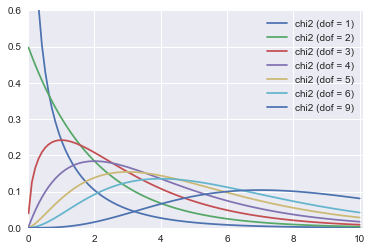

In [145]:
xx = np.linspace(0.01, 10, 100)
for df in [1, 2, 3, 4, 5, 6, 9]:
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), label=("chi2 (dof = %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.legend()
plt.show()

**제곱합이므로 0보다는 크며 특정 값에서 최댓값을 가진다.**

# F 분포

student-t 분포와 카이 제곱 분포는 가우시안 정규 분포를 따르는 하나의 확률 변수 $X$ 의 $n$개의 샘플로부터 생성할 수 있다.

이와 비슷하게 F 분포도 카이 제곱 분포를 따르는 독립적인 두 개의 확률 변수 $\chi^2_1(n_1)$와 $\chi^2_2(n_2)$의 확률 변수 샘플로부터 생성할 수 있다. 두 카이 제곱 분포의 샘플을 각각 $x_1$, $x_2$이라고 할 때 이를 각각 $n_1$, $n_2$로 나누어 그 비율을 구하면 $F(n_1, n_2)$ 분포가 된다. $n_1$, $n_2$는 F 분포의 자유도 인수이다.

$$ \dfrac{x_1 / n_1}{x_2/ n_2} \sim F(n_1, n_2) $$

F 분포의 확률 밀도 함수는 다음과 같이 정의된다.

$$ 
f(x; n_1,n_2) = \dfrac{\sqrt{\dfrac{(n_1\,x)^{n_1}\,\,n_2^{n_2}} {(n_1\,x+n_2)^{n_1+n_2}}}} {x\,\text{Beta}\!\left(\frac{n_1}{2},\frac{n_2}{2}\right)} 
$$

SciPy stats 서브패키지의 `f` 클래스는 F 분포를 지원한다.

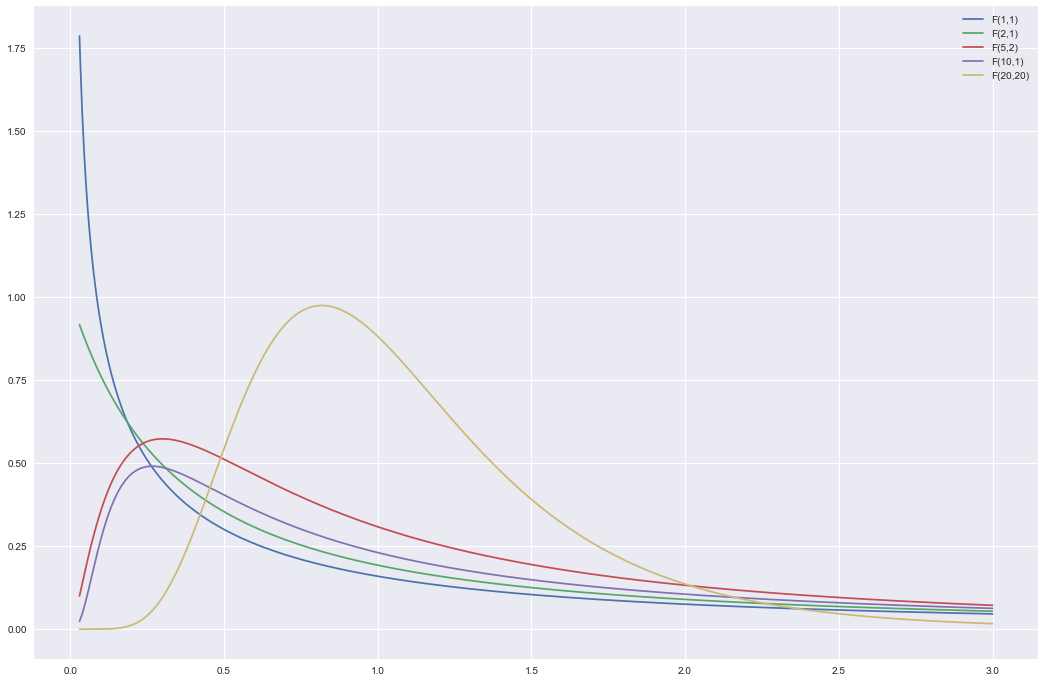

In [149]:
xx = np.linspace(0.03, 3, 1000)
plt.figure(figsize=(18,12))
plt.plot(xx, sp.stats.f(1,1).pdf(xx), label="F(1,1)")
plt.plot(xx, sp.stats.f(2,1).pdf(xx), label="F(2,1)")
plt.plot(xx, sp.stats.f(5,2).pdf(xx), label="F(5,2)")
plt.plot(xx, sp.stats.f(10,1).pdf(xx), label="F(10,1)")
plt.plot(xx, sp.stats.f(20,20).pdf(xx), label="F(20,20)")
plt.legend()
plt.show()

Jupyter NotebookLogout 검정과 모수 추정의 의미 (unsaved changes) Python 3
Python 3 Trusted
File
Edit
View
Insert
Cell
Kernel
Widgets
Help


# 검정과 모수 추정의 의미
​
데이터 분석의 첫번째 가정은 
​
<blockquote>
분석하고자 하는 데이터가 어떤 확률 변수(random variable)로부터 실현(realized)된 표본(sample)이다.
</blockquote>
​
라는 가정이다. 이 말은 우리가 정말 관심이 있는 것이 지금 손에 가지고 있는 데이터 즉, 하나의 실현체(reailization)에 불과한 표본이 아니라 그 뒤에서 이 데이터를 만들어 내고 있는 확률 변수라는 뜻이다. 데이터는 이 확률 변수를 알아내기 위한 일련의 참고 자료일 뿐이다.
​
확률 변수는 분포 모형(distribution model)과 모수(parameter)를 가진다. 따라서 확률 변수를 알아낸다는 것은 다음과 같은 질문에 답을 한다는 것이다.
​
1. 해당 데이터가 특정한 분포 모형, 예를 들면 가우시안 정규 분포로부터 생성된 것인가?
2. 만약 그렇다면 그 정규 분포의 기댓값 모수 $\mu$ 와 분산 $\sigma^2$이 특정한 값을 가지고 있는가? 예를 들면 $\mu = 0$ 인가 아닌가?
3. 정규 분포의 기댓값 모수 $\mu$가 0이 아니라면 구체적으로 어떤 값을 가질 것인가?
​
이러한 질문에 답을 하는 행위을 **검정(test)** 또는 **모수 추정(parameterestimation)**이라고 한다. 모수 추정은 간단히 추정(estimation)이라고 하기도 한다.
​
첫번째 질문은 확률 변수의 분포에 대한 가설(hypothesis)이 맞는지 틀리는지를 확인하는 확률 변수의 **분포 검정(distribution test)**라고 한다. 이 질문은 확률 변수의 분포가 정규 분포(normal distribution)이라는 것을 가설로 놓고 있다. 이러한 가설을 검정하는 것을 특별히 **정규성 검정(normality test)**이라고 하며 데이터 분석에서 가장 많이 사용되는 검정의 하나이다.
​
두번째 질문은 확률 변수의 분포가 어떤 모형을 따르는지는 이미 정해져 있는 상태에서 확률 밀도 함수(pdf)의 계수(coefficient) 즉, 모수(parameter)가 특정한 값을 가지는지 혹은 특정한 값과 비교하여 큰지 작은지를 확인하는 과정이다. 예를 들어 정규 분포의 기댓값 모수가 0인지 아닌지 확인하고 싶다면 "정규 분포의 기댓값 모수가 0이다."라는 가설을 증명하고 싶은 것이다. 이러한 가설을 검정하는 것을 **모수 검정(parameter test)**이라고 한다.
​
마지막 질문은 모수가 실제로 어떤 숫자를 가질 확률이 가장 높은지를 알아내는 작업으로 이러한 과정을 **모수 추정(parameter estimation)** 또는 **추정(estimation)**이라고 한다. 모수 추정 방법은 어려가지가 있다. MSE(Maximum Squred Error) 방법, MLE(Maximum Likelihood Estimation) 방법 등은 가장 확률이 높은 숫자 하나를 결정하는 방법의 하나이며 베이지안 추정법(Bayesian Estimation)은 가능한 모든 값에 대해 이 값들이 진짜 모수가 될 확률을 모두 계산하여 분포로 표시하는 방법이다.
In [ ]:

​


# 검정과 유의 확률

**검정(testing)**은 데이터 뒤에 숨어있는 확률 변수의 분포와 모수에 대한 가설의 진위를 정량적(quantitatively)으로 증명하는 작업을 말한다. 예를 들어 다음과 같은 문제는 검정 방법론을 사용하여 접근할 수 있다.

* 문제1

<blockquote> 
어떤 동전을 15번 던졌더니 12번이 앞면이 나왔다. 이 동전은 휘어지지 않은 공정한 동전(fair coin)인가?
</blockquote>

* 문제2

<blockquote> 
어떤 트레이더의 일주일 수익률은 다음과 같다.:<br>
-2.5%, -5%, 4.3%, -3.7% -5.6% <br>
이 트레이더는 돈을 벌어다 줄 사람인가, 아니면 돈을 잃을 사람인가? 
</blockquote>

이러한 문제들을 데이터 분석의 방법론으로 푼다면 다음과 같이 풀 수 있다.

1. 데이터가 어떤 고정된(fixed) 확률 분포를 가지는 확률 변수라고 가정한다. 동전은 베르누이 분포를 따르는 확률 변수의 표본이며 트레이더의 수익률은 정규 분포를 따르는 확률 변수의 표본이라고 가정한다.

2. 이 확률 분포의 모수값이 특정한 값을 가지는지 혹은 특정한 값보다 크거나 같은지 알고자 한다. 동전이 공정한 동전이라고 주정하는 것은 그 뒤의 베르누이 확률 분포의 모수 $\theta$의 값이 0.5 이라고 주장하는 것과 같다. 트레이더가 장기적으로 돈을 벌어다 줄 것이라고 주장하는 것은 그 뒤의 정규 분포의 기댓값 모수 $\mu$ 가 0보다 크거나 같다고 주장하는 것이다.

3. 모수 값이 이러한 주장을 따른다고 가정하면 실제로 현실에 나타난 데이터가 나올 확률을 계산할 수 있다. 동전의 경우에는 공정한 동전임에도 불구하고 15번 중 12번이나 앞면이 나올 확률을 계산할 수 있으며 트레이더의 경우에는 정규 분포에서 해당 데이터가 나올 확률을 계산할 수 있다.

4. 이렇게 구한 확률의 값이 판단자가 정한 특정한 기준에 미치지 못한다면 이러한 주장이 틀렸다고 생각할 수 밖에 없다. 반대로 값이 기준보다 높다면 그 주장이 틀렸다고 판단할 증거가 부족한 것이다.

## 가설

이렇게 확률 분포에 대한 어떤 주장을 가설(hypothesis)이라고 하며 $H$로 표기하는 경우가 많다. 이 가설을 증명하는 행위를 통계적 가설 검정(statistical hypothesis testing) 줄여서 검정(testing)이라고 한다. 특히 확률 분포의 모수 값이 특정한 값을 가진다는 주장을 모수 검정 (parameter testing)이라고 한다. 

가장 일반적으로 사용되는 가설은 모수의 값이 0 이라는 가설이다. 

$$ H: \theta = 0 $$

이 가설은 회귀 분석(regression)에서 흔하게 사용되는데 회귀 계수의 값이 0 이면 종속 변수(target)가 해당 독립 변수(feature)의 영향을 받지 않는 다는 의미가 된다.

## 검정 방법론

가설 증명, 즉 검정의 기본적인 논리는 다음과 같다.

1. 만약 가설이 맞다면 즉, 모수 값이 특정한 조건을 만족한다면 해당 확률 변수로부터 만들어진 표본(sample) 데이터들은 어떤 규칙을 따르게 된다.

2. 해당 규칙에 따라 표본 데이터 집합에서 어떤 숫자를 계산하면 계산된 숫자는 특정한 확률 분포를 따르게 된다. 이 숫자를 **검정 통계치(test statistics)**라고 하며 확률 분포를 **검정 통계 분포(test statistics distribution)**라고 한다. 검정 통계 분포의 종류 및 모수의 값은 처음에 정한 가설에 의해 결정된다. 이렇게 검정 통계 분포를 결정하는 최초의 가설을 **귀무 가설(Null hypothesis)**이라고 한다.

3. 데이터에 의해서 실제로 계산된 숫자, 즉, 검정 통계치가 해당 검정 통계 분포에서 나올 수 있는 확률을 계산한다. 이를 **유의 확률(p-value)라**고 한다.

4. 만약 유의 확률이 미리 정한 특정한 기준값보다 작은 경우를 생각하자. 이 기준값을 **유의 수준(significance level)**이라고 하는 데 보통 1% 혹은 5% 정도의 작은 값을 지정한다. 유의 확률이 유의 수준으로 정한 값(예 1%)보다도 작다는 말은 해당 검정 통계 분포에서 이 검정 통계치가 나올 수 있는 확률이 아주 작다는 의미이므로 가장 근본이 되는 가설 즉, 귀무 가설이 틀렸다는 의미이다. 따라서 이 경우에는 귀무 가설을 **기각(reject)**한다.

5. 만약 유의 확률이 유의 수준보다 크다면 해당 검정 통계 분포에서 이 검정 통계치가 나오는 것이 불가능하지만은 않다는 의미이므로 귀무 가설을 기각할 수 없다. 따라서 이 경우에는 귀무 가설을 **채택(accept)**한다.

## 귀무 가설과 대립 가설

검정 작업을 하기 위해서는 기각 혹은 채택하고자 하는 가설을 만들어야 한다. 이러한 가설을 귀무 가설(Null Hypothesis)이라고 하며 $H_0$ 로 표기한다. 일반적으로 검정에서 그냥 가설이라고 하면 귀무가설을 가리킨다. 귀무 가설이 사실이라고 증명되면 채택(accept)하고 거짓이라고 증명되면 기각(reject)한다.

귀무 가설이 기각되면 채택할 수도 있는 가설을 대립 가설(Alternative Hypothesis)이라고 하며 보통 $H_a$ 로 표기한다. 

예를 들어 귀무 가설 $H_0$가 다음과 같다고 가정하면,
$$ H_0: \theta = 0 $$

다음 가설들은 이 귀무 가설에 대한 대립 가설이 될 수 있다.
$$ H_a: \theta \neq 0 $$
$$ H_a: \theta > 0 $$
$$ H_a: \theta < 0 $$

첫번째와 같은 형태의 대립 가설을 가지는 경우를 양측 검정(two-tailed testing), 두번째나 세번째와 같은 형태의 대립 가설을 가지는 경우를  단측 검정(one-tailed testing)이라고 한다.

## 검정 통계량

검정을 하려면 즉, 귀무 가설이 맞거나 틀린 것을 증명하려면 어떤 증거가 있어야 한다. 이 증거에 해당하는 숫자를 검정 통계량(test statistics)라고 한다. 

비유를 들어보자.

"어떤 병에 걸렸다"라는 가설을 증명하려면 환자의 혈액을 채취하여 혈액 내의 특정한 성분의 수치를 측정해야 한다고 가정하자. 이 때 해당 수치가 바로 검정 통계량이 된다.

"어떤 학생이 우등 상장을 받을 수 있는 우등생이다"라는 가설을 증명하려면 시험(test)에 대한 성적을 측정하면 된다. 이 시험 성적을 검정 통계량이라고 부를 수 있다.

데이터 분석의 경우 검정 통계량은 데이터로부터 계산되는 일종의 함수이다.

$$
\text{test statistics } t = f(x_1, x_2, \ldots, x_n)
$$

예를 들어 동전을 $N$번 던질 경우 앞면이 나온 횟수가 $n$ 자체가 검정 통계량이 될 수 있다. 


정규 분포를 따르는 수익률의 경우라면 $N$개의 수익률 데이터 $x_1, \ldots, x_N$에서 다음 수식으로 계산한 값도 검정 통계량이 된다. 


$$
t = \dfrac{m}{\frac{s}{\sqrt{N}}}
$$

여기에서

$$
m = \dfrac{1}{N}\sum_{i=1}^{N} x_i
$$

$$
s^2 = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-m)^2
$$

검정 통계량은 표본 자료에서 계산된 함수값이므로 표본처럼 확률적(random)이다. 즉, 경우에 따라 표본 값이 달라질 수 있는 것처럼 달라진 표본값에 의해 검정 통계량도 달라진다. 따라서 검정 통계량 $t$ 도 검정 통계량 확률 변수 $T$ 라는 확률 변수의 표본으로 볼 수 있다.

데이터에 대한 아무 함수나 검정 통계량이 될 수 있는 것이 아닌다. 어떤 함수가 검정 통계량이 되려면 **귀무 가설이 사실일 경우 표본에서 계산된 검정 통계량이 따르는 검정 통계량 확률 변수 $T$의 확률 분포를 귀무 가설로부터 알 수 있어야만 한다.**

예를 들어 "어떤 병에 걸렸다"는 가설을 혈액 성분 수치로부터 판단하려면 병에 걸린 환자의 성분 수치가 어떤 분포를 따르는지 알 수 있어야 한다. 현실에서는 실제로 병에 걸린 다수의 환자의 혈액 성분 수치를 사용하여 검정 통계량 분포를 구한다.  또한 "어떤 학생이 우등생이다"라는 가설을 시험 성적으로부터 판단하라면 우등생인 모든 학생의 시험 성적에 대한 분포를 구해야 한다.

데이터 분석에서는 어떤 귀무 가설을 만족하는 표본을 입력 변수로 놓고 특정한 함수로 계산한 검정 통계량이 특정한 분포를 따른다는 것을 수학적인 증명을 통해 보이는 것이 일반적이다. 통계학자들의 중요한 업적 중의 하나가 특정한 귀무 가설에 대해 어떤 검정 통계량 함수가 어떤 검정 통계량 분포를 따른 다는 것을 증명해 준 것이다. 

## 검정 통계량의 예

일반적으로 많이 사용되는 검정 통계량에는 다음과 같은 것들이 있다.

### 1. 베르누이 분포 확률 변수

모수 $\theta$를 가지는 베르누이 분포 확률 변수에 대해서는 전체 시도 횟수 $N$ 번 중 성공한 횟수 $n$ 자체를 검정 통계량으로 쓸 수 있다. 이 검정 통계량은 자유도 $N$과 모수 $\theta$를 가지는 이항 분포를 따른다.

$$ x \sim \text{Ber}  \;\; \rightarrow \;\; t = \sum x \sim \text{Bin} $$

### 2. 카테고리  분포 확률 변수

모수 벡터 $\alpha$를 가지는 카테고리 분포 확률 변수에 대해서는 전체 시도 횟수 $N$ 번 중 성공한 횟수 벡터 $x$ 자체를 검정 통계량으로 쓸 수 있다. 이 검정 통계량은 자유도 $N$과 모수 벡터 $\alpha$를 가지는 다항 분포를 따른다.

$$ x \sim \text{Cat}  \;\; \rightarrow \;\; t = \sum x \sim \text{Mul} $$

### 3. 분산 $\sigma^2$ 값을 알고 있는 정규 분포 확률 변수

분산 모수 $\sigma^2$의 값을 알고 있는 정규 분포 확률 변수에 대해서는 다음과 같이 샘플 평균을 정규화(nomarlize)한 값을 검정 통계량으로 쓴다. 이 검정 통계량은 표준 정규 분포를 따른다. 이 검정 통계량은 특별히 $z$라고 부른다.


$$
x \sim \mathcal{N}(\mu, \sigma^2) \;\; \rightarrow \;\; z = \dfrac{m-\mu}{\frac{\sigma}{\sqrt{N}}} \sim \mathcal{N}(z;0,1)
$$

여기에서 $m$은 샘플 평균

$$
m = \dfrac{1}{N}\sum_{i=1}^{N} x_i
$$

### 4. 분산 $\sigma^2$ 값을 모르는 정규 분포 확률 변수

이번에는 분산 모수 $\sigma^2$의 값을 모르는 정규 분포 확률 변수를 고려하자.

평균 모수 $\mu$ 에 대한 검정을 할 때는 다음과 같이 샘플 평균을 샘플 분산으로 정규화(nomarlize)한 값을 검정 통계량으로 쓴다. 이 검정 통계량은 자유도가 $N-1$인 표준 student-t 분포를 따른다. $N$은 데이터의 수이다.


$$
x \sim \mathcal{N}(\mu, \sigma^2) \;\; \rightarrow \;\; t = \dfrac{m-\mu}{\frac{s}{\sqrt{N}}} \sim t(t;0,1,N-1)
$$

여기에서 $m$은 샘플 평균

$$
m = \dfrac{1}{N}\sum_{i=1}^{N} x_i
$$

$s^2$은 샘플 분산이다.
$$
s^2 = \dfrac{1}{N-1}\sum_{i=1}^{N} (x_i-m)^2
$$

분산 모수 $\sigma^2$에 대한 검정을 할 때는 다음과 같이 샘플 분산을 정규화(normalize)한 값을 검정 통계량으로 쓴다. 이 검정 통계량은 자유도가 $N-1$인 카이 제곱 분포를 따른다. $N$은 데이터의 수이다.

$$
x \sim \mathcal{N}(\mu, \sigma^2) \;\; \rightarrow \;\; t = (N-1)\dfrac{s^2}{\sigma^2} \sim \chi^2 (t;N-1)
$$

## 유의 확률 p-value

귀무 가설이 사실이라는 가정하에 검정 통계량이 따르는 검정 통계량 분포를 알고 있다면 실제 데이터에서 계산한 검정 통계량 숫자가 분포에서 어느 부분쯤에 위치해 있는지를 알 수 있다. 이 위치를 나타내는 값이 바로 **유의 확률(p-value)** 이다.

검정 통계량의 유의 확률은 **검정 통계량 숫자보다 더 희귀한(rare) 값이면서 대립 가설을 따르는 값이 나올 수 있는 확률**을 말한다. 이 확률은 검정 통계 확률 분포 밀도 함수(pdf)에서 양 끝의 꼬리(tail)부분에 해당하는 영역의 면적으로 계산한다. 실제로는 누적 확률 분포 함수를 사용한다.

유의 확률은 같은 귀무 가설에 대해서도 대립 가설이 어떤 것인가에 따라 달라질 수 있다. 

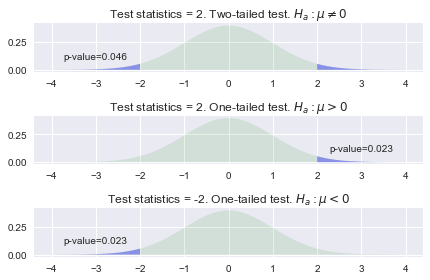

In [150]:
xx1 = np.linspace(-4, 4, 100)
xx2 = np.linspace(-4, -2, 100)
xx3 = np.linspace(2, 4, 100)

plt.subplot(3, 1, 1)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.text(-3, 0.1, "p-value=%5.3f" % (2*sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = 2. Two-tailed test. $H_a: \mu \neq 0$")

plt.subplot(3, 1, 2)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.text(3, 0.1, "p-value=%5.3f" % (sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = 2. One-tailed test. $H_a: \mu > 0$")

plt.subplot(3, 1, 3)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.text(-3, 0.1, "p-value=%5.3f" % (sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = -2. One-tailed test. $H_a: \mu < 0$")

plt.tight_layout()
plt.show()

유의 확률의 값이 아주 작으면 귀무 가설이 맞다는 가정하에 계산된 검정 통계량이 나올 가능성이 희귀하다는 의미이다. 

다시 예를 들자면 "어떤 병에 걸렸다"는 귀무 가설을 증명하기 위한 검정에서 혈액 검사를 사용하여 계산한 유의확률이 0.02%라는 의미는 실제로 병에 걸린 환자들 중 혈액 검사 수치가 해당 환자의 혈액 검사 수치보다 낮은 사람은 0.02% 뿐이었다는 뜻이고 "어떤 학생이 우등생이다."라는 귀무사설을 증명하기 위한 검정에서 시험 성적을 사용하여 계산한 유의확률이 0.3%라는 의미는 실제로 우등생의 성적을 분석해 보면 실수로 시험을 잘 못치른 경우를 포함해도 해당 점수보다 나쁜 경우는 0.3%에 지나지 않는다는 뜻이다.

따라서 이렇게 유의 확률의 값이 아주 작은 숫자가 나오면 해당 귀무 가설을 기각할 수 있다.

## 유의 수준과 기각역

계산된 유의 확률 값에 대해 귀무 가설을 기각하는지 채택하는지를 결정할 수 있는 기준 값을 유의 수준(level of significance)라고 한다. 일반적으로 사용되는 유의 수준은 1%, 5%, 10% 등이다.

검정 통계량이 나오면 확률 밀도 함수(또는 누적 확률 함수)를 사용하여 유의 확률을 계산할 수 있는 것처럼 반대로 특정한 유의 확률 값에 대해 해당하는 검정 통계량을 계산할 수도 있다. 유의 수준에 대해 계산된 검정 통계량을 기각역(critical value)라고 한다.

기각역 값을 알고 있다면 유의 확률을 유의 수준과 비교하는 것이 아니라 검정 통계량을 직접 기각역과 비교하여 기각/채택 여부를 판단할 수도 있다.

## 검정의 예

이제 서두에서 제기한 문제를 다시 풀어보자.

* 문제1

<blockquote> 
어떤 동전을 15번 던졌더니 12번이 앞면이 나왔다. 이 동전은 휘어지지 않은 공정한 동전(fair coin)인가?
</blockquote>

동전의 앞면이 나오는 것을 숫자 1, 뒷면이 나오는 것을 숫자 0으로 나타낸다면 이 문제는 베르누이 확률 변수의 모수 검정 문제로 생각할 수 있다. 판단하고자하는 귀무 가설은 베르누이 확률 분포 모수 $\theta = 0.5$이다. 

이 문제에 대한 검정 통계량은 15번 던져 앞면이 나온 횟수가 12이고 이 값은 자유도가 15인 이항 분포를 따른다. 이 경우의 유의 확률을 계산하면 
1.76% 이다.
$$ \text{Bin}(n \geq 12;N=15) = 0.017578125 $$

In [151]:
1 - sp.stats.binom(15, 0.5).cdf(12-1)

0.017578125

이 값은 5% 보다는 작고 1% 보다는 크기 때문에 유의 수준이 5% 라면 기각할 수 있으며(즉 공정한 동전이 아니라고 말할 수 있다.) 유의 수준이 1% 라면 기각할 수 없다.(즉, 공정한 동전이 아니라고 말할 수 없다.)

* 문제2

<blockquote> 
어떤 트레이더의 일주일 수익률은 다음과 같다.:<br>
-2.5%, -5%, 4.3%, -3.7% -5.6% <br>
이 트레이더는 돈을 벌어다 줄 사람인가, 아니면 돈을 잃을 사람인가? 
</blockquote>

수익률이 정규 분포를 따른 다고 가정하면 이 트레이더의 검정통계량은 다음과 같이 계산된다.

$$ t = \dfrac{m}{\frac{s}{\sqrt{N}}} = -1.4025 $$

이 검정 통계량에 대한 유의 확률은 11.67%이다.

$$ F(t=-1.4025;4) = 0.1167 $$

In [152]:
x = np.array([-0.025, -0.05, 0.043, -0.037, -0.056])
t = x.mean()/x.std(ddof=1)*np.sqrt(len(x))
t, sp.stats.t(df=4).cdf(t)

(-1.4025921414082105, 0.11669216509589829)

만약 유의 수준이 10%라면 유의 확률이 이보다 크기 때문에 귀무 가설을 기각할 수 없다. 즉, 정규 분포의 기댓값이 0 보다 작다고 말할수 없다. 따라서 해당 트레이더가 장기적으로 손실을 보는 트레이더라고 말할 수 있는 증거가 부족하다는 의미이다.

# SciPy를 사용한 기초적인 검정

SciPy 파이썬 패키지는 다음과 같은 다양한 검정 명령을 제공한다.

* 이항 검정 (Binomial test)
* 카이 제곱 검정 (Chi-square test)
* 단일 표본 z-검정 (One-sample z-test)
* 단일 표본 t-검정 (One-sample t-test)
* 독립 표본 t-검정 (Independent-two-sample t-test)
* 대응 표본 t-검정 (Paired-two-sample t-test)
* 분산 검정 (Chi squared variance test)
* 등분산 검정 (Equal-variance test)
* 정규성 검정 (Normality test)

## 이항 검정 (Binomial test)

이항 검정은 이항 분포를 이용하여 Bernoulli 분포 모수 $\theta$에 대한 가설을 조사하는 검정 방법이다. SciPy stats 서브패키지의 `binom_test` 명령을 사용한다. 디폴트 귀무 가설은 $\theta = 0.5$이다.

* scipy.stats.binom_test
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html

데이터 갯수 $N=10$, 실제 모수 $\theta_0=0.5$인 경우 대해 이항 검정 명령을 실시해 보자.

In [153]:
N = 10
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [154]:
sp.stats.binom_test(n, N)

0.34374999999999989

유의 확률(p-value)이 34%로 높으므로 귀무 가설을 기각할 수 없다. 따라서 $\theta=0.5$이다.

데이터 갯수 $N=100$, 실제 모수 $\theta_0=0.5$인 경우 대해 이항 검정 명령을 실시해 보자.

In [155]:
N = 100
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [156]:
sp.stats.binom_test(n, N)

0.92041076261282062

유의 확률(p-value)이 92%로 높으므로 귀무 가설을 기각할 수 없다. 따라서 $\theta=0.5$이다.

데이터 갯수 $N=100$, 실제 모수 $\theta_0=0.35$인 경우 대해 이항 검정 명령을 실시해 보자.

In [158]:
N = 100
theta_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [159]:
sp.stats.binom_test(n, N)

0.00018314322488235352

유의 확률(p-value)이 0.018%로 낮으므로 귀무 가설을 기각할 수 있다. 따라서 $\theta \neq 0.5$이다.

## 카이 제곱 검정 (Chi-square test)

카이 제곱 검정은 goodness of fit 검정이라고도 부른다. 카테고리 분포의 모수 $\theta=(\theta_1, \ldots, \theta_K)$에 대한 가설을 조사하는 검정 방법이다. SciPy stats 서브패키지의 `chisquare` 명령을 사용한다. 디폴트 귀무 가설은 $\theta = \left(\frac{1}{K}, \ldots, \frac{1}{K} \right)$이다.

* scipy.stats.chisquare
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html   

데이터 갯수 $N=10$, 실제 모수 $\theta_0=(0.25, 0.25, 0.25, 0.25)$인 경우 대해 카이 제곱 검정 명령을 실시해 보자.

In [160]:
N = 10
K = 4
theta_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2], dtype=int64)

In [161]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.1999999999999993, pvalue=0.157724450396663)

유의 확률(p-value)이 17.8%로 높으므로 귀무 가설을 기각할 수 없다. 따라서 $\theta_0=(0.25, 0.25, 0.25, 0.25)$이다.

데이터 갯수 $N=100$, 실제 모수 $\theta_0=(0.35, 0.30, 0.20, 0.15)$인 경우 대해 카이 제곱 검정 명령을 실시해 보자.

In [163]:
N = 100
K = 4
theta_0 = np.array([0.35, 0.30, 0.20, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11], dtype=int64)

In [164]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.559999999999999, pvalue=0.00087034719789121269)

유의 확률(p-value)이 0.087%이므로 귀무 가설을 기각할 수 있다. 따라서 $\theta \neq (0.25, 0.25, 0.25, 0.25))$이다.

## 단일 표본 z-검정 (One-sample z-test)

단일 표본 z-검정은 분산 $\sigma^2$의 값을 정확히 알고 있는 정규 분포의 표본에 대해 기댓값을 조사하는 검정방법이다. 단일 표본 z-검정의 경우에는 SciPy에 별도의 함수가 준비되어 있지 않으므로 `norm` 명령의 `cdf` 메서드를 사용하여 직접 구현해야 한다.

* scipy.stats.norm
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

데이터 갯수 $N=10$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

In [165]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [166]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu)/ np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

In [167]:
ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

유의 확률(p-value)이 1.96%이므로 만약 유의 수준이 5% 이상 이라면 귀무 가설을 기각할 수 있다. 따라서 $\mu \neq 0$이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.

오류의 유형 중에서 이러한 오류는 귀무 가설이 진실임에도 불구하고 거짓으로 나온 경우로 **유형 1 오류(Type 1 Error)**라고 한다.

데이터 갯수 $N=100$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

In [168]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)

In [169]:
ztest_1samp(x)

(0.59808015534484993, 0.54978645086241684)

유의 확률(p-value)이 54.98%이므로 귀무 가설을 기각할 수 없다. 따라서 $\mu = 0$이다. 

## 단일 표본 t-검정 (One-sample t-test)

단일 표본 t-검정은 정규 분포의 표본에 대해 기댓값을 조사하는 검정방법이다. SciPy의 stats 서브 패키지의 `ttest_1samp` 명령을 사용한다.  `ttest_1samp` 명령의 경우에는 디폴트 모수가 없으므로 `popmean` 인수를 사용하여 직접 지정해야 한다.


* scipy.stats.ttest_1samp
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

데이터 갯수 $N=10$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

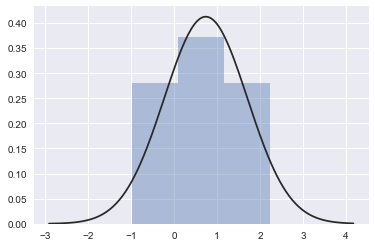

In [174]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [175]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.2894396723896699, pvalue=0.047818464908570578)

유의 확률(p-value)이 4.78%이므로 만약 유의 수준이 5% 이상 이라면 귀무 가설을 기각할 수 있다. 따라서 $\mu \neq 0$이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.

데이터 갯수 $N=100$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [176]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.2894396723896699, pvalue=0.047818464908570578)

유의 확률(p-value)이 55.62%이므로 귀무 가설을 기각할 수 없다. 따라서 $\mu = 0$이다. 

## 독립 표본 t-검정 (Independent-two-sample t-test)

독립 표본 t-검정(Independent-two-sample t-test)은 간단하게 two sample t-검정이라고도 한다. 두 개의 독립적인 정규 분포에서 나온 두 개의 데이터 셋을 사용하여 두 정규 분포의 기댓값이 동일한지를 검사한다. SciPy stats 서브패키지의 `ttest_ind` 명령을 사용한다. 독립 표본 t-검정은 두 정규 분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정 통계량이 다르기 때문에  `equal_var` 인수를 사용하여 이를 지정해 주어야 한다.

* scipy.stats.ttest_ind
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

두 정규 분포의 기댓값이 $\mu_1 = 0$, $\mu_2 = 1$으로 다르고  분산은 $\sigma_1 = \sigma_2 = 1$ 으로 같으며 샘플의 수가 $N_1=N_2=10$인 경우를 실행해 보자

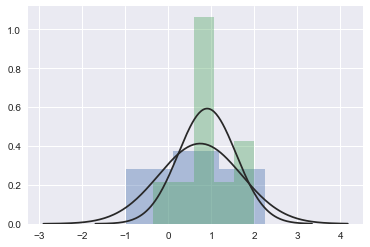

In [177]:
N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [178]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-0.41399685269886549, pvalue=0.68376768941164268)

유의 확률(p-value)이 68.4%이므로 귀무 가설을 기각할 수 없다. 따라서 $\mu_1 = \mu_2$이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 

오류의 유형 중에서 이러한 오류는 귀무 가설이 거짓임에도 불구하고 진실로 나온 경우로 **유형 2 오류(Type 2 Error)**라고 한다.

데이터 수가 증가하면 이러한 오류가 발생할 가능성이 줄어든다.

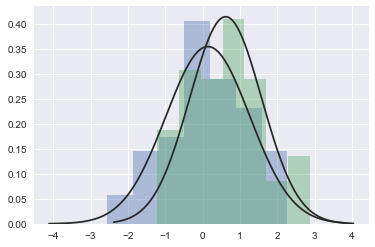

In [179]:
N_1 = 50; mu_1 = 0; sigma_1 = 1
N_2 = 100; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [180]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.0081339709157226582)

데이터의 갯수를 50개와 100개로 증가시킨 경우에 유의 확률은 0.8%로 감소하였다. 따라서 두 확률 분포의 기댓값이 일치한다는 귀무 가설은 기각할 수 있다.

## 대응 표본 t-검정 (Paired-two-sample t-test)

대응 표본 t-검정은 독립 표본 t-검정을 두 집단의 샘플이 1대1 대응하는 경우에 대해 수정한 것이다. 즉, 독립 표본 t-검정과 마찬가지로 두 정규 분포의 기댓값이 같은지 확인하기 위한 검정이다.

예를 들어 어떤 반의 학생들이 특강을 수강하기 전과 수강한 이후에 각각 시험을 본 시험 점수의 경우에는 같은 학생의 두 점수는 대응할 수 있다. 이 대응 정보를 알고 있다면 보통의 독립 표본 t-검정에서 발생할 수 있는 샘플간의 차이의 영향을 없앨 수 있기 때문에 특강 수강의 영향을 보다 정확하게 추정할 수 있다.

* scipy.stats.ttest_rel
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

$\mu_1 = 0$, $\mu_2 = 0.5$로 평균이 달라진 경우에 대해 대응 표본 t-검정을 실시해 보자. 데이터 갯수 $N$은 5 이다.

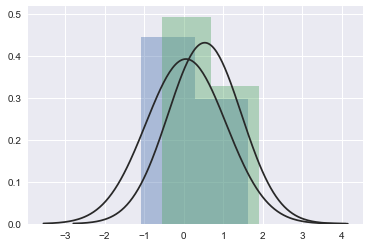

In [181]:
N = 5
mu_1 = 0
mu_2 = 0.5
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [182]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-7.1723380661732756, pvalue=0.0020008849290622677)

5 개의 데이터만으로도  두 평균이 다르다는 것을 유의 확률(p-value) 0.2%의 정확도로 알아내었음을 확인할 수 있다.5 개의 데이터만으로도  두 평균이 다르다는 것을 유의 확률(p-value) 0.2%의 정확도로 알아내었음을 확인할 수 있다.

## 카이 제곱 분산 검정 (Chi-Square Test for the Variance)

지금까지는 정규 분포의 기댓값을 비교하는 검정을 살펴보았다. 이제는 정규 분포의 분산에 대해 살펴보자.

카이 제곱 분산 검정(Chi-Square Test for the Variance)은 정규 분포의 샘플 분산 값은 정규화 하면 카이 제곱 분포를 따른다는 점을 이용하는 검정 방법이다.

그러나 SciPy는 카이 제곱 분산 검정에 대한 명령이 없으므로 `chi2` 클래스를 사용하여 직접 구현해야 한다.

In [183]:
def chi2var_test(x, sigma2=1):
    v = x.var(ddof=1)
    t = (len(x) - 1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))

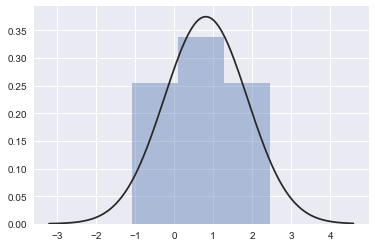

1.0637871321863899

In [184]:
N = 10
mu_0 = 0
sigma_0 = 1.1
np.random.seed(0)
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
x.std()

In [186]:
chi2var_test(x)

(11.316430626053437, 0.25464123584764542)

## 등분산 검정 (Equal-variance test)

등분산 검정은 두 정규 분포로부터 생성된 두 개의 데이터 집합으로부터 두 정규 분포의 분산 모수가 같은지 확인하기 위한 검정이다. 가장 기본적인 방법은 F분포를 사용하는 것이지만 실무에서는 이보다 더 성능이 좋은 bartlett, fligner, levene 방법을 주로 사용한다. SciPy의 stats 서브패키지는 이를 위한  `bartlett`, `fligner`, `levene` 명령을 제공한다.

* scipy.stats.bartlett
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
* scipy.stats.fligner
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html
* scipy.stats.levene
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html   

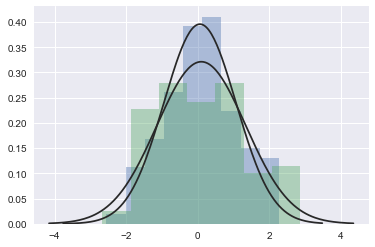

(1.0078822447165796, 1.2416003969261071)

In [187]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
x1.std(), x2.std()

In [188]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.2534738372322662, pvalue=0.039170128783651344)

In [189]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.2248419904094572, pvalue=0.0071901501067483673)

In [190]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.6807089476794372, pvalue=0.0061135154970207925)

## 정규성 검정

회귀 분석 등에서는 확률 분포가 가우시안 정규 분포를 따르는지 아닌지를 확인하는 것이 중요하다. 이러한 검정을 정규성 검정(normality test)이라고 한다. 정규성 분포 그 중요도 만큼 여러가지 검정 방법들이 개발되어 있으며 Scipy 패키지 이외에도 statsmodels 패키지에도 다양한 정규성 검정 명령어를 제공한다. 

### statsmodels에서 제공하는 정규성 검정 명령어

* Omnibus Normality test
 * `statsmodels.stats.stattools.omni_normtest`
    * http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.omni_normtest.html

* Jarque–Bera test
 * `statsmodels.stats.stattools.jarque_bera`
   * http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.jarque_bera.html

* Kolmogorov-Smirnov test
 * `statsmodels.stats.diagnostic.kstest_normal`
   * http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.kstest_normal.html

* Lilliefors test
 * `statsmodels.stats.diagnostic.lillifors`
   * http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.lillifors.html


### SciPy 에서 제공하는 정규성 검정 명령어

* Kolmogorov-Smirnov test
 * `scipy.stats.ks_2samp`
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

* Shapiro–Wilk test
 * `scipy.stats.shapiro`
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
     
* Anderson–Darling test
 * `scipy.stats.anderson`
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
 
* D'Agostino's K-squared test
 * `scipy.stats.mstats.normaltest`
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.normaltest.html

이 중에서 Kolmogorov-Smirnov 검정은 사실 정규 분포에 국한되지 않고 두 샘플이 같은 분포를 따르는지 확인할 수 있는 방법이다.

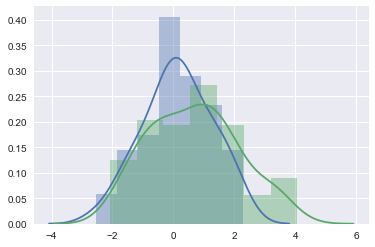

In [191]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
sns.distplot(x1)
sns.distplot(x2)
plt.show()

In [192]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.23000000000000004, pvalue=0.049516112814422863)